## PRAMOD NAGISETTY
## Clg mail id : pn118@student.le.ac.uk
## University name : University of Leicester

# Data Loading

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/dataset_med.csv'
df = pd.read_csv(file_path)

# View of Dataset

In [ ]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   id   age  gender      country diagnosis_date cancer_stage family_history  \
0   1  64.0    Male       Sweden     2016-04-05      Stage I            Yes   
1   2  50.0  Female  Netherlands     2023-04-20    Stage III            Yes   
2   3  65.0  Female      Hungary     2023-04-05    Stage III            Yes   
3   4  51.0  Female      Belgium     2016-02-05      Stage I             No   
4   5  37.0    Male   Luxembourg     2023-11-29      Stage I             No   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2                280             1       1          0   
2   Former Smoker  44.0                268             1       1          0   
3  Passive Smoker  43.0                241             1       1          0   
4  Passive Smoker  19.7                178             0       0          0   

   other_cancer treat

# Dataset information

In [ ]:
# Display basic info about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date 

# Statistical Summary

In [ ]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                  id            age            bmi  cholesterol_level  \
count  890000.000000  890000.000000  890000.000000      890000.000000   
mean   445000.500000      55.007008      30.494172         233.633916   
std    256921.014128       9.994485       8.368539          43.432278   
min         1.000000       4.000000      16.000000         150.000000   
25%    222500.750000      48.000000      23.300000         196.000000   
50%    445000.500000      55.000000      30.500000         242.000000   
75%    667500.250000      62.000000      37.700000         271.000000   
max    890000.000000     104.000000      45.000000         300.000000   

        hypertension         asthma      cirrhosis   other_cancer  \
count  890000.000000  890000.000000  890000.000000  890000.000000   
mean        0.750024       0.469740       0.225956       0.088157   
std         0.432999       0.499084       0.418211       0.283524   
min         0.000000       0.000000       0.0

# Exploratory Data Analysis

## Distribution Analysis

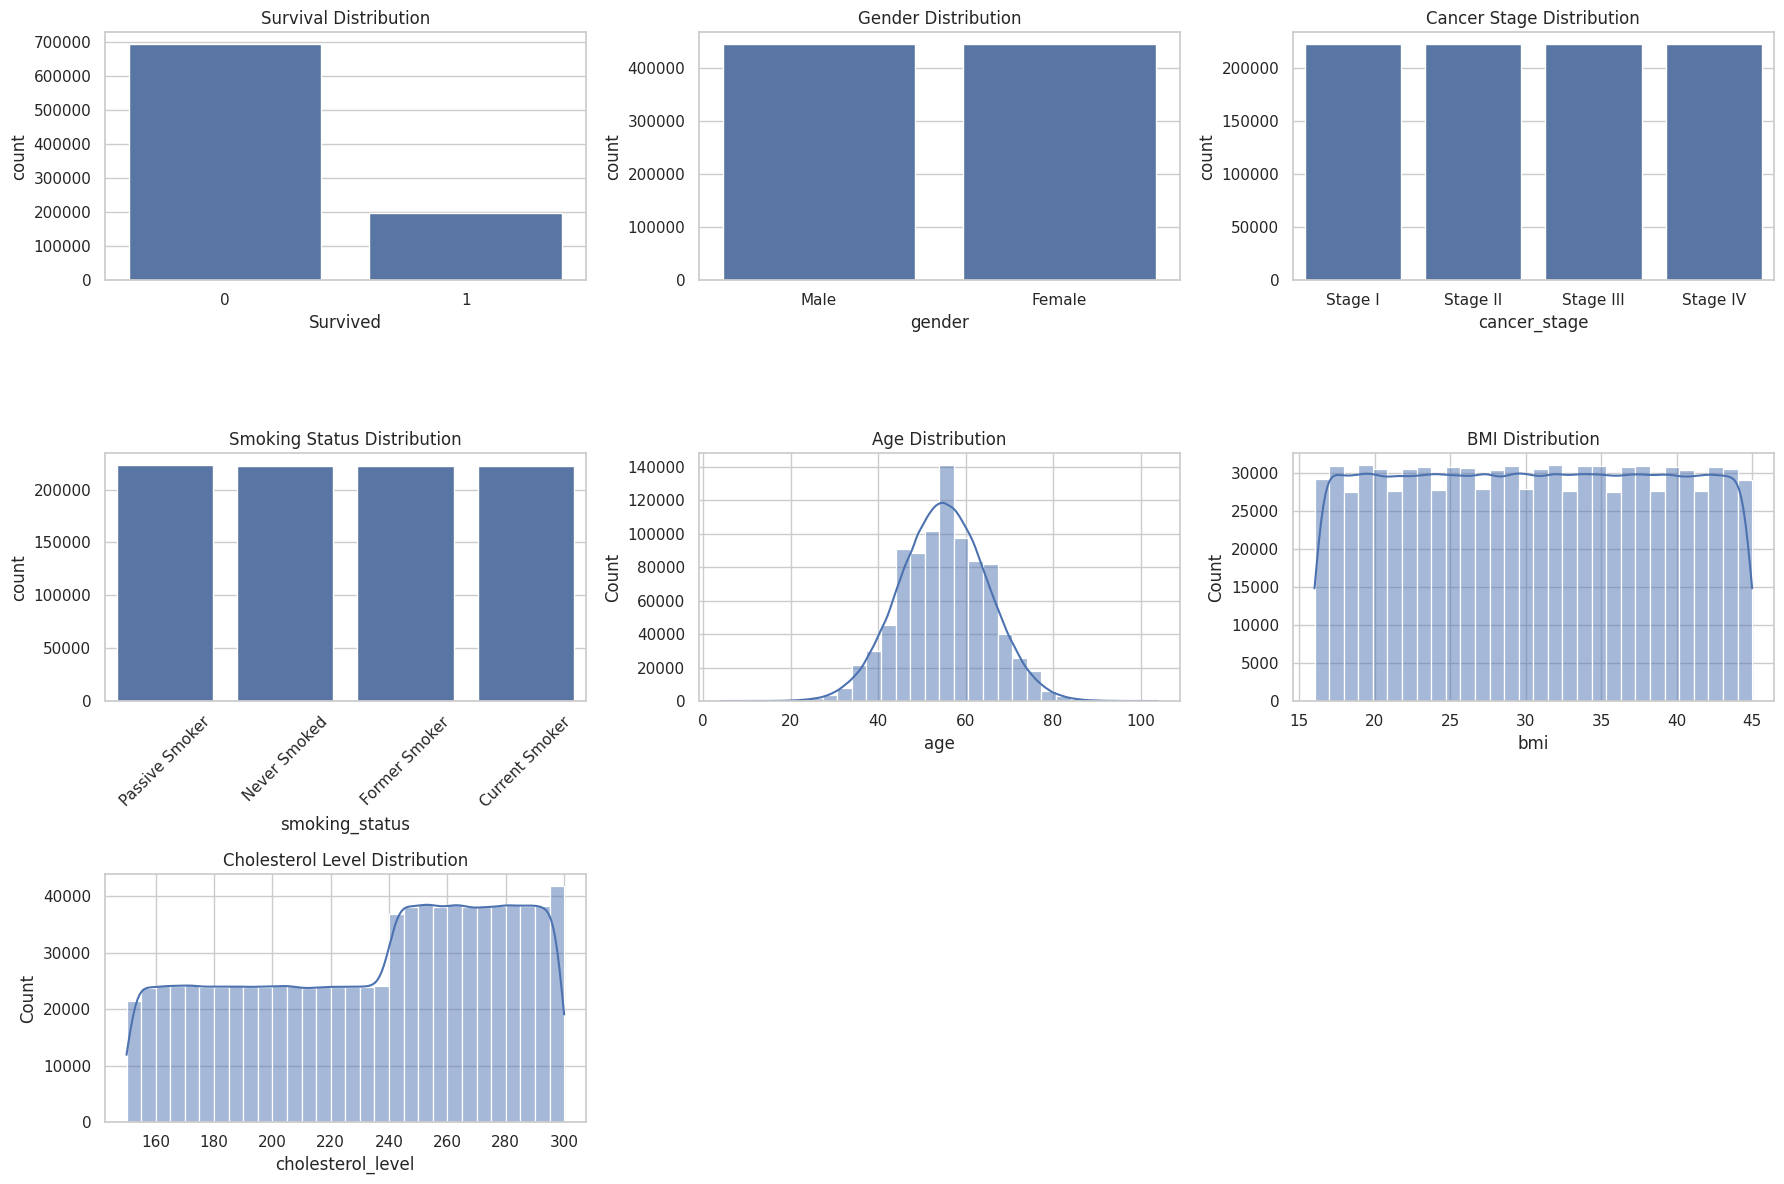

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')
plt.figure(figsize=(18, 12))

# Plot 1: Survived
plt.subplot(3, 3, 1)
sns.countplot(data=df, x='survived')
plt.title('Survival Distribution')
plt.xlabel('Survived')

# Plot 2: Gender
plt.subplot(3, 3, 2)
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')

# Plot 3: Cancer Stage
plt.subplot(3, 3, 3)
sns.countplot(data=df, x='cancer_stage', order=['Stage I', 'Stage II', 'Stage III', 'Stage IV'])
plt.title('Cancer Stage Distribution')

# Plot 4: Smoking Status
plt.subplot(3, 3, 4)
sns.countplot(data=df, x='smoking_status', order=df['smoking_status'].value_counts().index)
plt.title('Smoking Status Distribution')
plt.xticks(rotation=45)

# Plot 5: Age
plt.subplot(3, 3, 5)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')

# Plot 6: BMI
plt.subplot(3, 3, 6)
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')

# Plot 7: Cholesterol Level
plt.subplot(3, 3, 7)
sns.histplot(df['cholesterol_level'], bins=30, kde=True)
plt.title('Cholesterol Level Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


# Label Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying the original df
encoded_df = df.copy()

# Drop date columns
encoded_df.drop(['diagnosis_date', 'end_treatment_date', 'id'], axis=1, inplace=True)

# Convert 'family_history' from Yes/No to binary
encoded_df['family_history'] = encoded_df['family_history'].map({'Yes': 1, 'No': 0})

# Identify remaining categorical columns
categorical_cols = encoded_df.select_dtypes(include='object').columns.tolist()

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    encoded_df[col] = le.fit_transform(encoded_df[col])

# Check result
print("Encoded DataFrame preview:")
print(encoded_df.head())


Encoded DataFrame preview:
    age  gender  country  cancer_stage  family_history  smoking_status   bmi  \
0  64.0       1       26             0               1               3  29.4   
1  50.0       0       19             2               1               3  41.2   
2  65.0       0       12             2               1               1  44.0   
3  51.0       0        1             0               0               3  43.0   
4  37.0       1       17             0               0               3  19.7   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                199             0       0          1             0   
1                280             1       1          0             0   
2                268             1       1          0             0   
3                241             1       1          0             0   
4                178             0       0          0             0   

   treatment_type  survived  
0               0         0  
1    

In [ ]:
encoded_df

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,1,26,0,1,3,29.4,199,0,0,1,0,0,0
1,50.0,0,19,2,1,3,41.2,280,1,1,0,0,3,1
2,65.0,0,12,2,1,1,44.0,268,1,1,0,0,1,0
3,51.0,0,1,0,0,3,43.0,241,1,1,0,0,0,0
4,37.0,1,17,0,0,3,19.7,178,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,1,18,3,0,3,44.8,243,1,1,1,0,2,0
889996,62.0,0,4,1,1,1,21.6,240,0,0,0,0,3,0
889997,48.0,0,7,2,1,2,38.6,242,1,0,0,0,1,1
889998,67.0,0,23,3,1,1,18.6,194,1,1,0,0,0,0


# HeatMap Correlation analysis

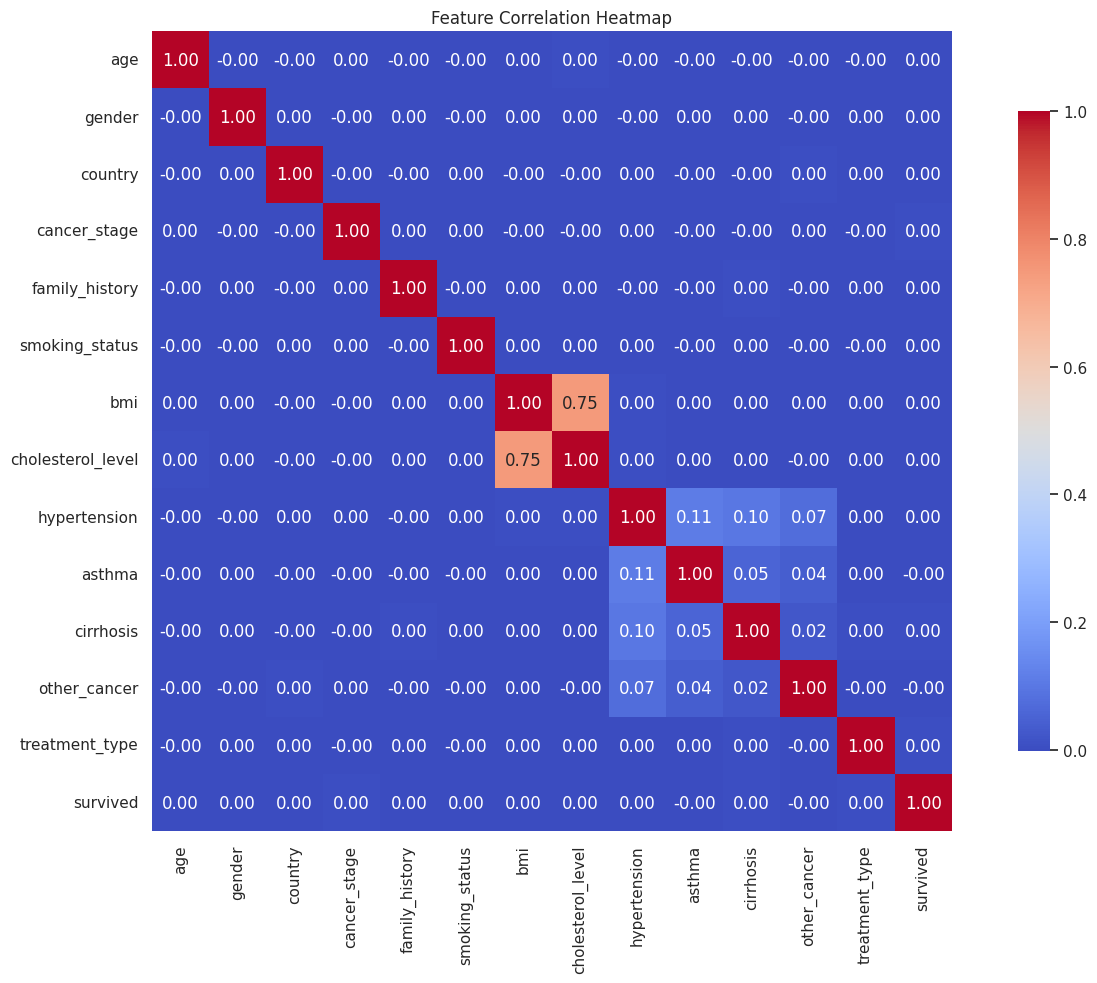

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = encoded_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


# Survival Rate by Diagnosis Year


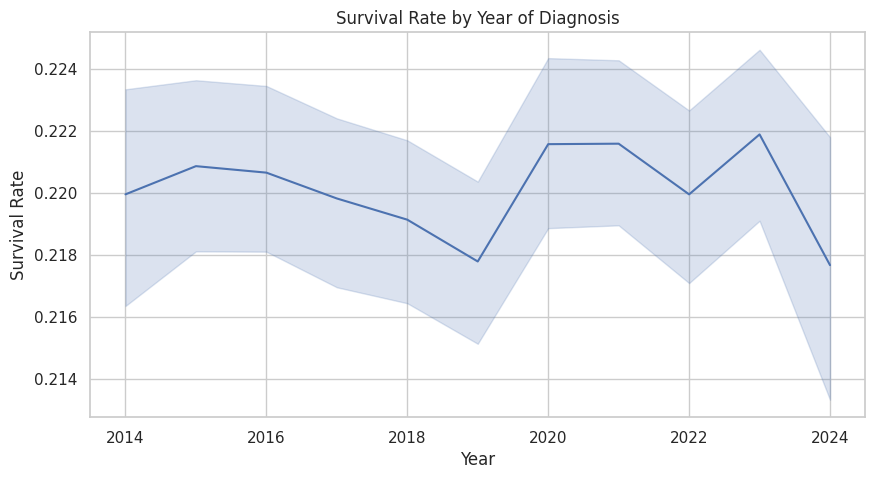

In [ ]:
df['diagnosis_year'] = pd.to_datetime(df['diagnosis_date']).dt.year

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='diagnosis_year', y='survived')
plt.title('Survival Rate by Year of Diagnosis')
plt.xlabel('Year')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()


# Boxplot of BMI and Cholesterol by Survival

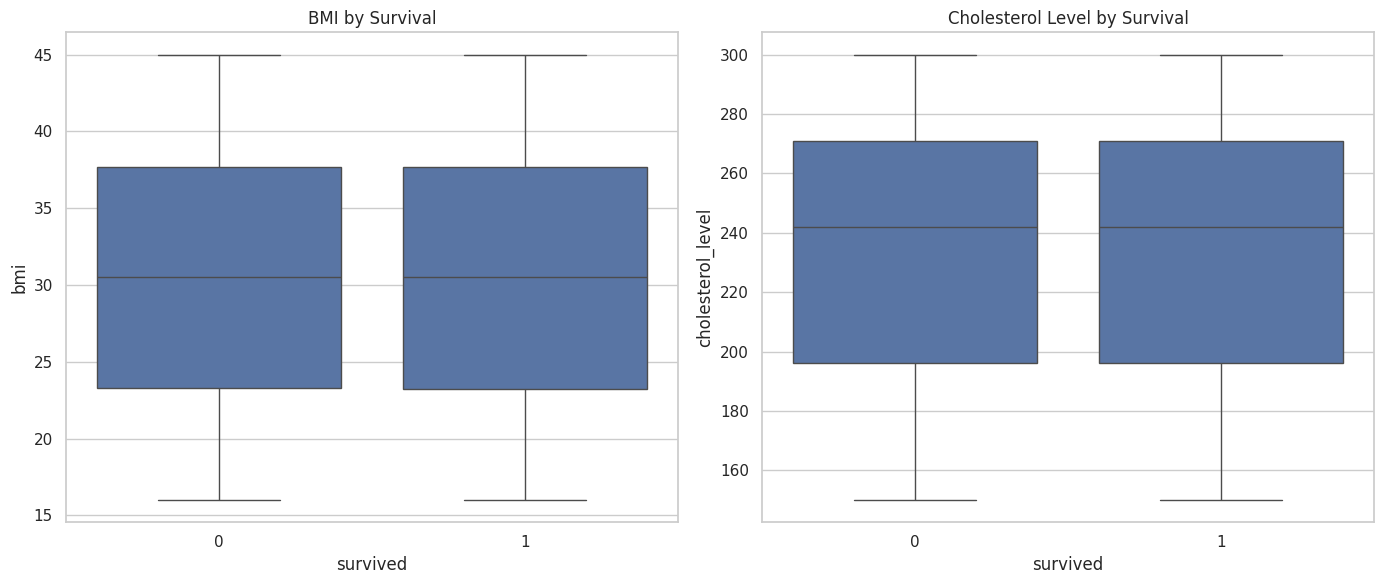

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, x='survived', y='bmi', ax=axes[0])
axes[0].set_title('BMI by Survival')

sns.boxplot(data=df, x='survived', y='cholesterol_level', ax=axes[1])
axes[1].set_title('Cholesterol Level by Survival')

plt.tight_layout()
plt.show()


# Survival Heatmap: Cancer Stage vs Treatment Type

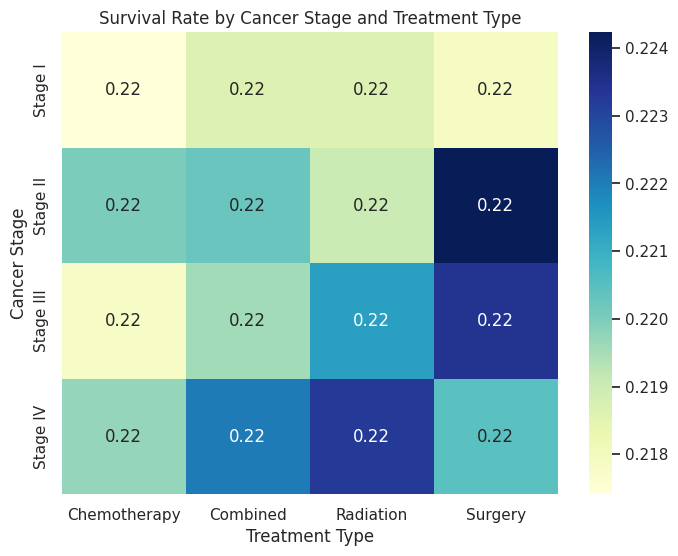

In [ ]:
pivot = df.pivot_table(values='survived',
                       index='cancer_stage',
                       columns='treatment_type',
                       aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Survival Rate by Cancer Stage and Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Cancer Stage')
plt.show()


# Top Countries by Patient Count & Survival Rate

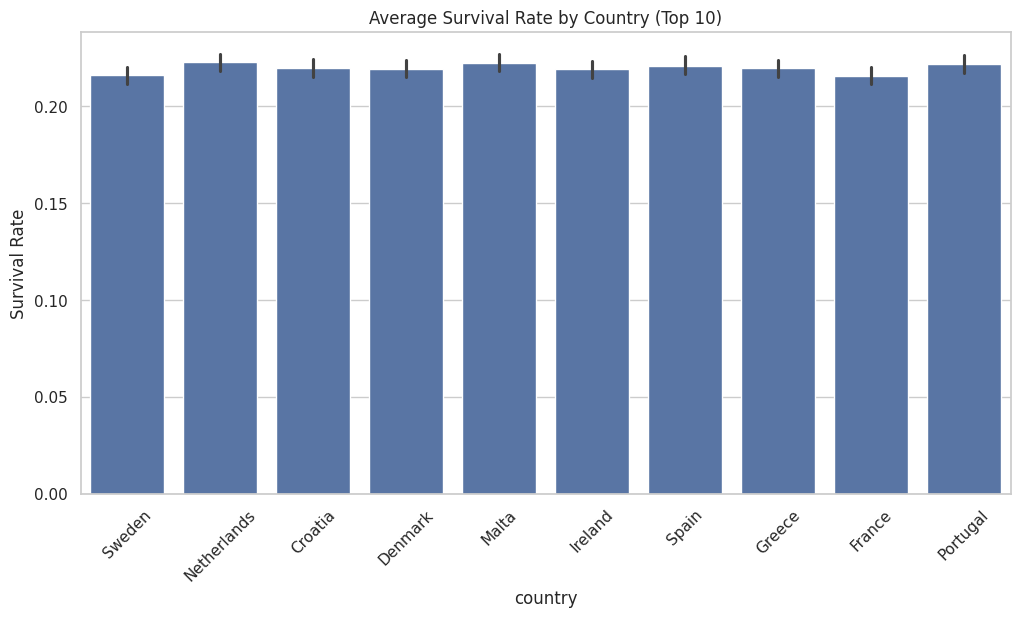

In [ ]:
top_countries = df['country'].value_counts().nlargest(10).index
subset = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(data=subset, x='country', y='survived', estimator=lambda x: sum(x)/len(x))
plt.title('Average Survival Rate by Country (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Survival Rate')
plt.show()


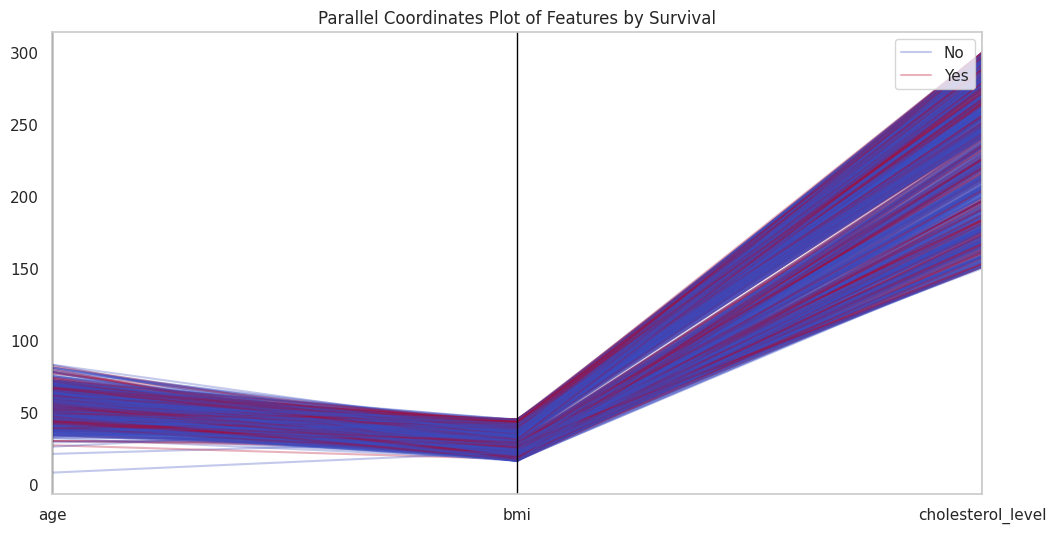

In [ ]:
from pandas.plotting import parallel_coordinates

subset = df[['age', 'bmi', 'cholesterol_level', 'survived']].sample(1000, random_state=1)  # sample for visibility
subset['survived'] = subset['survived'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(12, 6))
parallel_coordinates(subset, 'survived', colormap='coolwarm', alpha=0.3)
plt.title('Parallel Coordinates Plot of Features by Survival')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target
X = encoded_df.drop('survived', axis=1)
y = encoded_df['survived']

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# Recombine into a balanced DataFrame
balanced_df = pd.concat([pd.DataFrame(X_bal, columns=X.columns), pd.Series(y_bal, name='survived')], axis=1)

# Confirm class distribution
print("Original target distribution:", Counter(y))
print("Balanced target distribution:", Counter(y_bal))


Original target distribution: Counter({0: 693996, 1: 196004})
Balanced target distribution: Counter({0: 693996, 1: 693996})


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = balanced_df.drop('survived', axis=1)
y = balanced_df['survived']

# First split: train vs temp (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Second split: validation vs test (50% of the 30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Output the shapes
print(f"Train Set:     {X_train.shape}, {y_train.shape}")
print(f"Validation Set:{X_val.shape}, {y_val.shape}")
print(f"Test Set:      {X_test.shape}, {y_test.shape}")


Train Set:     (971594, 13), (971594,)
Validation Set:(208199, 13), (208199,)
Test Set:      (208199, 13), (208199,)



Training Logistic Regression...
Logistic Regression - Validation Accuracy: 0.6458, Test Accuracy: 0.6443

Training Random Forest...
Random Forest - Validation Accuracy: 0.7318, Test Accuracy: 0.7316

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:35:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Validation Accuracy: 0.7102, Test Accuracy: 0.7089


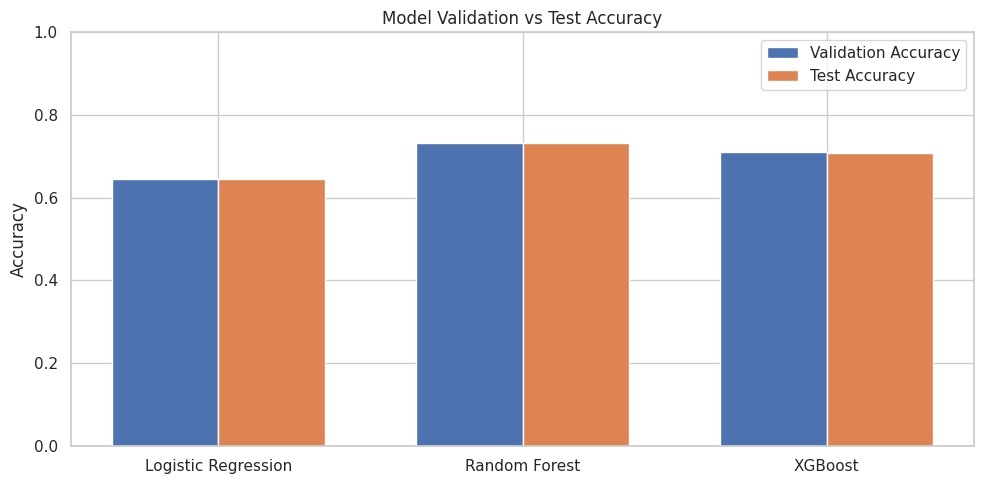


Best Model: Random Forest — Confusion Matrix & Classification Report


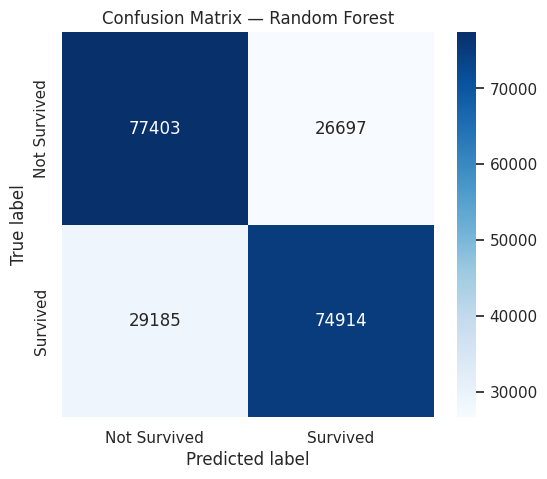


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73    104100
           1       0.74      0.72      0.73    104099

    accuracy                           0.73    208199
   macro avg       0.73      0.73      0.73    208199
weighted avg       0.73      0.73      0.73    208199



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional: XGBoost
try:
    from xgboost import XGBClassifier
    xgb_installed = True
except ImportError:
    xgb_installed = False

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

if xgb_installed:
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train, validate, test
val_accuracies = {}
test_accuracies = {}
test_preds = {}
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)

    # Validation Accuracy
    val_pred = model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, val_pred)
    val_accuracies[name] = val_acc

    # Test Accuracy
    test_pred = model.predict(X_test_scaled)
    test_preds[name] = test_pred
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies[name] = test_acc

    print(f"{name} - Validation Accuracy: {val_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    # Save best model for confusion matrix
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_model = name

# Plot Validation vs Test Accuracy
plt.figure(figsize=(10, 5))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, val_accuracies.values(), width, label='Validation Accuracy')
plt.bar(x + width/2, test_accuracies.values(), width, label='Test Accuracy')
plt.xticks(x, list(models.keys()))
plt.ylabel('Accuracy')
plt.title('Model Validation vs Test Accuracy')
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Confusion Matrix & Classification Report for Best Model
print(f"\nBest Model: {best_model} — Confusion Matrix & Classification Report")

conf = confusion_matrix(y_test, test_preds[best_model])
report = classification_report(y_test, test_preds[best_model])

plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title(f'Confusion Matrix — {best_model}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(f"\nClassification Report:\n{report}")